<h1 style="color:red;font-family:cursive;text-align:left;font-weight:500;">M Talal Iftikhar</h1>
<h1 style="color:red;font-family:cursive;text-align:left;font-weight:500;">2022-ag-8570</h1>

<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Importing Libraries</h1>

In [1]:
# importing pandas library
import pandas as pd
# import numpy library
import numpy as np
# import LaebelEncoder and StandardScaler from sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
# import seaborn
import seaborn as sns
# import matplotlib for plotting graphs and heatmaps
import matplotlib.pyplot as plt
# import PCA 
from sklearn.decomposition import PCA
# import train_test_split module from sklearn
from sklearn.model_selection import train_test_split
# impert accuracy_score to calculate accuracy
from sklearn.metrics import accuracy_score
# import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
# import classification_report from sklearn
from sklearn.metrics import classification_report
# import gaussian naive bayes 
from sklearn.naive_bayes import GaussianNB
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import SVC from SVM
from sklearn.svm import SVC
# import Decison tree classifier
from sklearn.tree import DecisionTreeClassifier
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
# imporitng a utility from sklearn to plot decison tree
from sklearn.tree import plot_tree
# import the Sequential module from tensorflow
  from tensorflow.keras.models import Sequential
# impoert Dense and input from tensorflow
  from tensorflow.keras.layers import Dense,Input

<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Pre-processing</h1>

### Loading data into pandas

In [2]:
# laod and read the dataset
df=pd.read_csv("avocado.csv")
# print information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Find null values in data

In [3]:
# find null values in each column
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
# find total null values in dataset
df.isna().sum().sum()

0

### Convert categorical columns into numerical columns

In [5]:
# create an object for label encoder
le=LabelEncoder()
# convert Date to numerical column
df["Date"]=le.fit_transform(df["Date"])
# convert type to numerical column
df["type"]=le.fit_transform(df["type"])
# convert region to numerical column
df["region"]=le.fit_transform(df["region"])
# print information after converting to numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int32  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(2)
memory usage: 1.7 MB


### Change the name of columns for ease

In [6]:
#changing 4046 to Small_sized
df.rename(columns = {'4046': 'Small_sized'}, inplace=True)
#chainging 4225 to Medium_sized
df.rename(columns = {'4225': 'Medium_sized'}, inplace=True)
#chainging 4046 to Large_sized
df.rename(columns = {'4770': 'Large_sized'}, inplace=True)
# printing information after replacing names of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int32  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   Small_sized   18249 non-null  float64
 5   Medium_sized  18249 non-null  float64
 6   Large_sized   18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(2)
memory usage: 1.7 MB


### Finding Correlation before dropping columns

In [7]:
# find correlation between columns
correlation=df.corr()
# print correlation
correlation

,Unnamed: 0,Date,AveragePrice,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
Small_sized,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
Medium_sized,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
Large_sized,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


### Heatmap before dropping columns

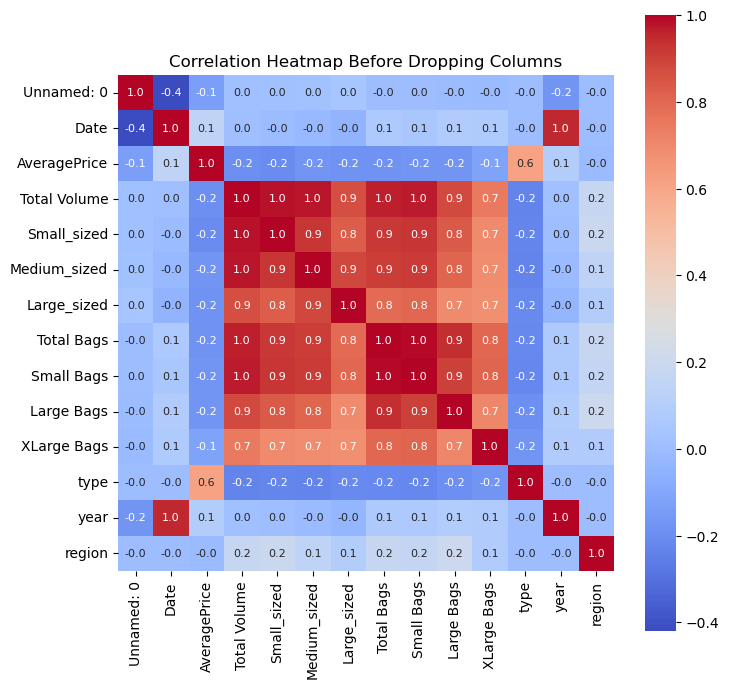

In [8]:
# specify the figure size of heatmap
plt.figure(figsize=(8,8))
# specify properties of heatmap
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')
# give title to heatmap
plt.title("Correlation Heatmap Before Dropping Columns")
# print the heatmap
plt.show()

### Dropping columns identified from heatmap

In [9]:
# drop un-desired columns
df=df.drop(["Unnamed: 0","Date","year","region"],axis=1)
# print information after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Small_sized   18249 non-null  float64
 3   Medium_sized  18249 non-null  float64
 4   Large_sized   18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.3 MB


### Find correlation after dropping columns

In [10]:
# find correlation after dropping columns
correlation=df.corr()
# print correlation
correlation

,AveragePrice,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags,type
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434
Small_sized,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819
Medium_sized,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289
Large_sized,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000


### Heatmap after dropping columns

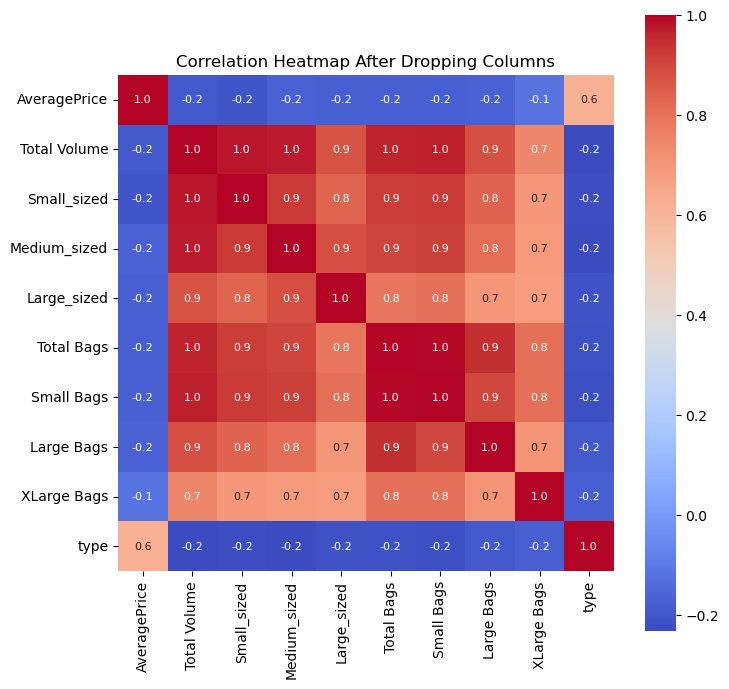

In [11]:
# specify the figure size of heatmap
plt.figure(figsize=(8,8))
# specify properties of heatmap
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')
# give title to heatmap
plt.title("Correlation Heatmap After Dropping Columns")
# print the heatmap
plt.show()

## Data Splitting

In [12]:
# store features in X
X=df.drop(["type"],axis=1)
# store class in Y
Y=df["type"]
# print X
X

,AveragePrice,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [13]:
# print Y
Y

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

## Standardization of Data

In [14]:
# create object for StandardScaler
scaler=StandardScaler()
# scale the features
X_scaled=scaler.fit_transform(X)
# print sclaed data
X_scaled[:1]

array([[-0.18868864, -0.22771641, -0.23081597, -0.1999022 , -0.21209136,
        -0.23417028, -0.2326465 , -0.22235202, -0.17557961]])

## Applying PCA

In [15]:
# apply PCA with minimum features
pca=PCA(n_components=7)
# apply pca on sclaed data
X_pca=pca.fit_transform(X_scaled)
# print the shape 
X_pca.shape

(18249, 7)

<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Training the Models after applying PCA</h1>

### Train,Test,Split the data

In [16]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X_pca,Y,test_size=0.20,random_state=20)
# printing the size of Train X
print("Size of Train X =",len(X_TRAIN))
# printing the size of Train Y
print("Size of Train Y =",len(Y_TRAIN))
# printing the size of Test X
print("Size of Test X =",len(X_TEST))
# printing the size of Test Y
print("Size of Test Y =",len(Y_TEST))

Size of Train X = 14599
Size of Train Y = 14599
Size of Test X = 3650
Size of Test Y = 3650


<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Gaussian Naive Bayes</h1>

In [17]:
# create an object for gaussian naive bayes
gnb=GaussianNB()
# train the model
gnb.fit(X_TRAIN,Y_TRAIN)

GaussianNB()

### Prediction on Training data

In [18]:
# make predictions on trainin data
training_data_prediction=gnb.predict(X_TRAIN)
# print predicted values
print(training_data_prediction)

[1 1 0 ... 1 0 1]


In [19]:
# calculate the training accuracy
train_accuracy=accuracy_score(Y_TRAIN,training_data_prediction)
# print training accuracy
print("Training Accuracy : ",train_accuracy)

Training Accuracy :  0.7399821905609973


#### Confusion matrix for training data

In [20]:
# draw confusion matrix
confusion_matrix(Y_TRAIN,training_data_prediction)

array([[3657, 3632],
       [ 164, 7146]], dtype=int64)

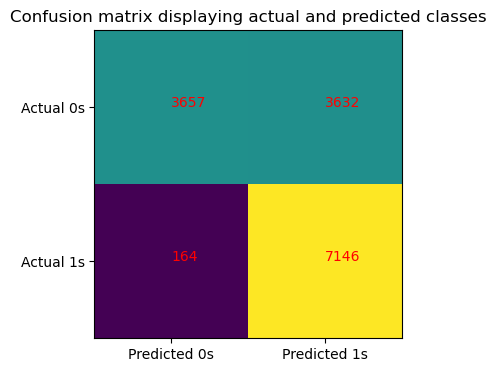

In [21]:
# creating a confusion matrix between actual and predicted training data 
cm=confusion_matrix(Y_TRAIN,training_data_prediction)
# specifying the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# specifying the title of matrix
plt.title("Confusion matrix displaying actual and predicted classes")
# specifying the x label of matrix
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# specifying the y label of matrix
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# set the limit of matrix
ax.set_ylim(1.5,-0.5)
# iterate over the rows and columns
for i in range(2):
    for j in range(2):
        # adding text properties to matrix
        ax.text(j,i,cm[i,j],color='red')
# plot the matrix
plt.show()

#### Classification report for Train Data

In [22]:
# lassification report for actual and predicted values
report=classification_report(Y_TRAIN,training_data_prediction)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.50      0.66      7289
           1       0.66      0.98      0.79      7310

    accuracy                           0.74     14599
   macro avg       0.81      0.74      0.72     14599
weighted avg       0.81      0.74      0.72     14599



### Prediction on Testing Data

In [23]:
# predicted y based on test x
y_pred=gnb.predict(X_TEST)
# print predicted y
print(y_pred)

[1 1 1 ... 1 0 0]


In [24]:
# calculate the testing accuracy
test_accuracy=accuracy_score(Y_TEST,y_pred)
# print testing accuracy
print("Testing Accuracy : ",test_accuracy)

Testing Accuracy :  0.7386301369863014


#### Confusion Matrix for Test Data

In [25]:
# draw confusion matrix
confusion_matrix(Y_TEST,y_pred)

array([[ 918,  919],
       [  35, 1778]], dtype=int64)

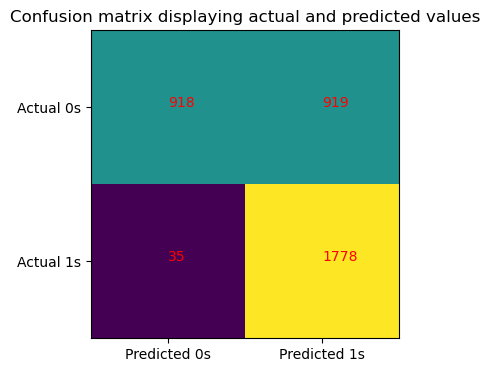

In [26]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification Report for Test Data

In [27]:
# calssification report between actual and predicted values
report=classification_report(Y_TEST,y_pred)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.50      0.66      1837
           1       0.66      0.98      0.79      1813

    accuracy                           0.74      3650
   macro avg       0.81      0.74      0.72      3650
weighted avg       0.81      0.74      0.72      3650



<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Logistic Regression</h1>

In [28]:
# create object for logistic regression
logistic_regressor=LogisticRegression()
# train the model
logistic_regressor.fit(X_TRAIN,Y_TRAIN)


LogisticRegression()

In [29]:
# accessing classes used in classification model
logistic_regressor.classes_

array([0, 1])

In [30]:
# accessing the intercept term of trained model
logistic_regressor.intercept_

array([-9.59234078])

In [31]:
# accessing the coefficients of trained model
logistic_regressor.coef_

array([[-17.77647528,   0.41666489,   5.61922014, -13.51738798,
          8.21154262,   4.82616188,  -9.78554292]])

### Prediction on Training Data

In [32]:
# make predictions on training data
training_data_prediction=logistic_regressor.predict(X_TRAIN)
# printed predicted samples
print(training_data_prediction)

[1 1 0 ... 1 0 1]


In [33]:
# calculate the training accuracy
train_accuracy=accuracy_score(Y_TRAIN,training_data_prediction)
# print training accuracy
print("Training Accuracy : ",train_accuracy)

Training Accuracy :  0.9180765805877115


#### Confusion matrix for training data

In [34]:
# confusion matrix between actual and predicted values
confusion_matrix(Y_TRAIN,training_data_prediction)

array([[6481,  808],
       [ 388, 6922]], dtype=int64)

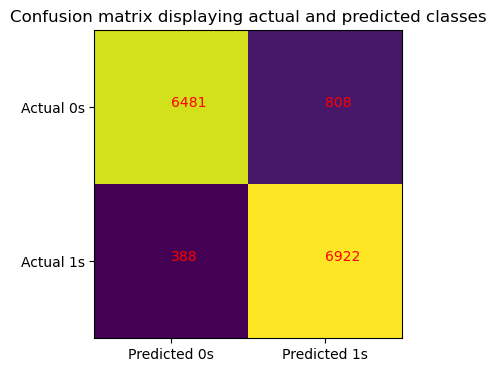

In [35]:
# creating a confusion matrix between actual and predicted training data 
cm=confusion_matrix(Y_TRAIN,training_data_prediction)
# specifying the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# specifying the title of matrix
plt.title("Confusion matrix displaying actual and predicted classes")
# specifying the x label of matrix
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# specifying the y label of matrix
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# set the limit of matrix
ax.set_ylim(1.5,-0.5)
# iterate over the rows and columns
for i in range(2):
    for j in range(2):
        # adding text properties to matrix
        ax.text(j,i,cm[i,j],color='red')
# plot the matrix
plt.show()

#### Classification report for training data

In [36]:
# classification report for actual and predicted valuues
report=classification_report(Y_TRAIN,training_data_prediction)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7289
           1       0.90      0.95      0.92      7310

    accuracy                           0.92     14599
   macro avg       0.92      0.92      0.92     14599
weighted avg       0.92      0.92      0.92     14599



### Prediction on Testing Data

In [37]:
# make predictions on test data
y_pred=logistic_regressor.predict(X_TEST)
# print predicted y
print(y_pred)

[1 1 1 ... 1 0 0]


In [38]:
# calculate the testing accuracy
test_accuracy=accuracy_score(Y_TEST,y_pred)
# print testing accuracy
print("Testing Accuracy : ",test_accuracy)

Testing Accuracy :  0.9287671232876712


#### Confusion Matrix for testing data

In [39]:
# confusion matrix for actual and predicted labels
confusion_matrix(Y_TEST,y_pred)

array([[1654,  183],
       [  77, 1736]], dtype=int64)

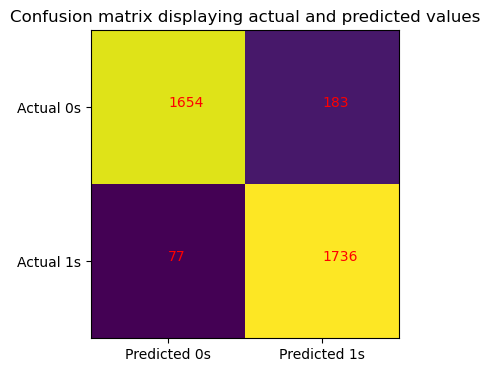

In [40]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification Report for testing data

In [41]:
# classification report for actual and predicted values
report=classification_report(Y_TEST,y_pred)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1837
           1       0.90      0.96      0.93      1813

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> SVC</h1>

In [42]:
# create object for SVC
svc=SVC(kernel='linear')
# train the model
svc.fit(X_TRAIN,Y_TRAIN)

SVC(kernel='linear')

### Prediction on Training Data

In [43]:
# make predictions on training data
training_data_prediction=svc.predict(X_TRAIN)
# print predicted values
print(training_data_prediction)

[1 1 0 ... 1 0 1]


In [44]:
# calculate the training accuracy
train_accuracy=accuracy_score(Y_TRAIN,training_data_prediction)
# print training accuracy
print("Training Accuracy : ",train_accuracy)

Training Accuracy :  0.9367079936981985


#### Confusion matrix for training data

In [45]:
# confusion matrix between actual and predicted values
confusion_matrix(Y_TRAIN,training_data_prediction)

array([[6554,  735],
       [ 189, 7121]], dtype=int64)

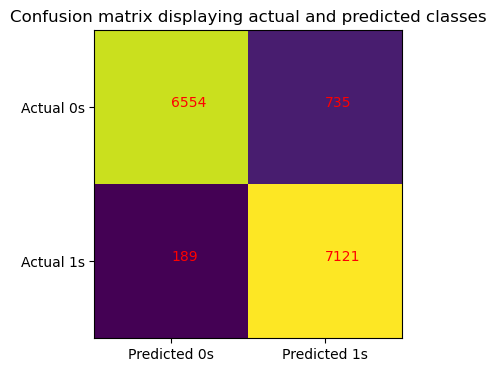

In [46]:
# creating a confusion matrix between actual and predicted training data 
cm=confusion_matrix(Y_TRAIN,training_data_prediction)
# specifying the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# specifying the title of matrix
plt.title("Confusion matrix displaying actual and predicted classes")
# specifying the x label of matrix
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# specifying the y label of matrix
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# set the limit of matrix
ax.set_ylim(1.5,-0.5)
# iterate over the rows and columns
for i in range(2):
    for j in range(2):
        # adding text properties to matrix
        ax.text(j,i,cm[i,j],color='red')
# plot the matrix
plt.show()

#### Classification report for training data

In [47]:
# classification report between actual and predicted values
report=classification_report(Y_TRAIN,training_data_prediction)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7289
           1       0.91      0.97      0.94      7310

    accuracy                           0.94     14599
   macro avg       0.94      0.94      0.94     14599
weighted avg       0.94      0.94      0.94     14599



### Prediction on Testing Data

In [48]:
# makin predictions on test data
y_pred=svc.predict(X_TEST)
# print predicted values
print(y_pred)

[1 1 1 ... 1 0 0]


In [49]:
# calculate the testing accuracy
test_accuracy=accuracy_score(Y_TEST,y_pred)
# print testing accuracy
print("Testing Accuracy : ",test_accuracy)

Testing Accuracy :  0.9391780821917808


#### Confusion Matrix for testing data

In [50]:
# confusion matrix between actual and predicted values
confusion_matrix(Y_TEST,y_pred)

array([[1650,  187],
       [  35, 1778]], dtype=int64)

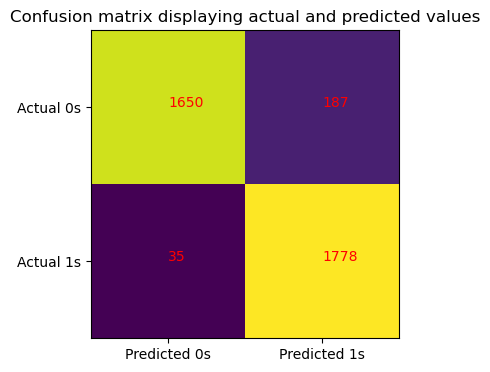

In [51]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification report for testing data

In [52]:
# classification report between actual and predicted values
report=classification_report(Y_TEST,y_pred)
# print report
print(report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1837
           1       0.90      0.98      0.94      1813

    accuracy                           0.94      3650
   macro avg       0.94      0.94      0.94      3650
weighted avg       0.94      0.94      0.94      3650



<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Decision Tree</h1>

In [53]:
# create object for decision tree classifier
dt_classifier=DecisionTreeClassifier()
# training the model
dt_classifier.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier()

### Prediction On Training data

In [54]:
# making  predictions on testing data
training_data_prediction=dt_classifier.predict(X_TRAIN)
# print predicted values
print(training_data_prediction)

[1 0 0 ... 1 0 1]


In [55]:
# calculate the training accuracy
train_accuracy=accuracy_score(Y_TRAIN,training_data_prediction)
# print training accuracy
print("Training Accuracy : ",train_accuracy)

Training Accuracy :  1.0


#### Confusion matrix for training data

In [56]:
# confusion matric between actual and predicted training samples
confusion_matrix(Y_TRAIN,training_data_prediction)

array([[7289,    0],
       [   0, 7310]], dtype=int64)

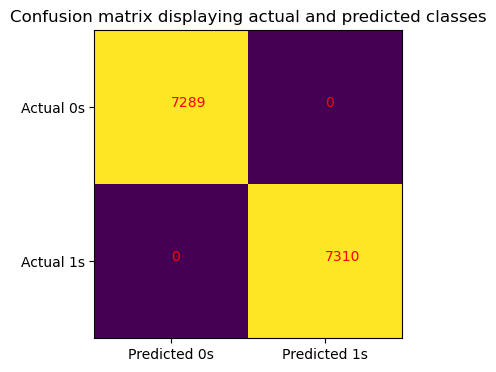

In [57]:
# creating a confusion matrix between actual and predicted training data 
cm=confusion_matrix(Y_TRAIN,training_data_prediction)
# specifying the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# specifying the title of matrix
plt.title("Confusion matrix displaying actual and predicted classes")
# specifying the x label of matrix
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# specifying the y label of matrix
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# set the limit of matrix
ax.set_ylim(1.5,-0.5)
# iterate over the rows and columns
for i in range(2):
    for j in range(2):
        # adding text properties to matrix
        ax.text(j,i,cm[i,j],color='red')
# plot the matrix
plt.show()

#### Classification report for training data

In [58]:
report=classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7289
           1       1.00      1.00      1.00      7310

    accuracy                           1.00     14599
   macro avg       1.00      1.00      1.00     14599
weighted avg       1.00      1.00      1.00     14599



### Prediction On Testing Data

In [59]:
# making predictions on test data
y_pred=dt_classifier.predict(X_TEST)
# print predicted values
print(y_pred)

[0 1 0 ... 1 0 0]


In [60]:
# calculate the testing accuracy
test_accuracy=accuracy_score(Y_TEST,y_pred)
# print testing accuracy
print("Testing Accuracy : ",test_accuracy)

Testing Accuracy :  0.9624657534246576


#### Confusion Matrix for Testing data

In [61]:
# draw a confusion matrix
confusion_matrix(Y_TEST,y_pred)

array([[1770,   67],
       [  70, 1743]], dtype=int64)

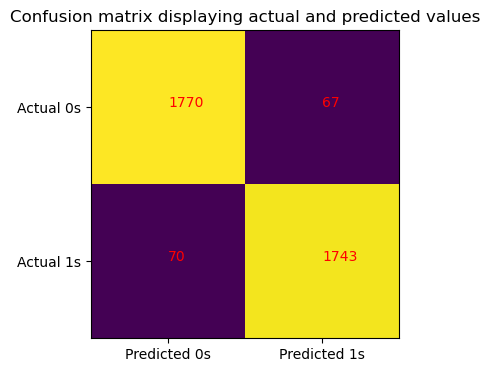

In [62]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification Report for testing data

In [63]:
# classification report between actual and predicted Y
report=classification_report(Y_TEST,y_pred)
# print the report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1837
           1       0.96      0.96      0.96      1813

    accuracy                           0.96      3650
   macro avg       0.96      0.96      0.96      3650
weighted avg       0.96      0.96      0.96      3650



<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Random Forest</h1>

In [64]:
# create an object for random forest classifier
rf_classifier=RandomForestClassifier(n_estimators=20,random_state=20)
# train the model
rf_classifier.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(n_estimators=20, random_state=20)

### Prediction on Training Data

In [65]:
# predict y based on train x
training_data_prediction=rf_classifier.predict(X_TRAIN)
# print predicted Y
print(training_data_prediction)

[1 0 0 ... 1 0 1]


In [66]:
# calculate the training accuracy 
train_accuracy=accuracy_score(Y_TRAIN,training_data_prediction)
# print training accuracy
print("Train Accuracy : ",train_accuracy)

Train Accuracy :  0.9995205151037743


#### Confusion matrix for training data

In [67]:
# create a confusion matrix
confusion_matrix(Y_TRAIN,training_data_prediction)

array([[7288,    1],
       [   6, 7304]], dtype=int64)

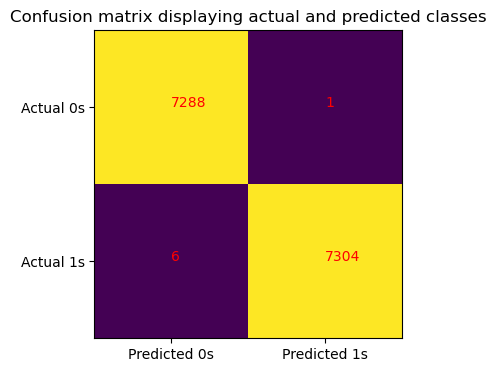

In [68]:
# creating a confusion matrix between actual and predicted training data 
cm=confusion_matrix(Y_TRAIN,training_data_prediction)
# specifying the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# specifying the title of matrix
plt.title("Confusion matrix displaying actual and predicted classes")
# specifying the x label of matrix
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# specifying the y label of matrix
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# set the limit of matrix
ax.set_ylim(1.5,-0.5)
# iterate over the rows and columns
for i in range(2):
    for j in range(2):
        # adding text properties to matrix
        ax.text(j,i,cm[i,j],color='red')
# plot the matrix
plt.show()

#### Classification report for training data

In [69]:
# classification report between actual and predicted values
report=classification_report(Y_TRAIN,training_data_prediction)
# print report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7289
           1       1.00      1.00      1.00      7310

    accuracy                           1.00     14599
   macro avg       1.00      1.00      1.00     14599
weighted avg       1.00      1.00      1.00     14599



### Prediction on Testing data

In [70]:
# predict the vlaues of y based on test X
y_pred=rf_classifier.predict(X_TEST)
# print predicted Y
print(y_pred)

[1 1 0 ... 1 0 0]


In [71]:
# calculate the testing accuracy
test_accuracy=accuracy_score(Y_TEST,y_pred)
# print testing accuracy
print("Test Accuracy : ",test_accuracy)

Test Accuracy :  0.9764383561643836


#### Confusion Matrix for testing data

In [72]:
# plot the confusion matrix between actual and predicted test samples
confusion_matrix(Y_TEST,y_pred)

array([[1801,   36],
       [  50, 1763]], dtype=int64)

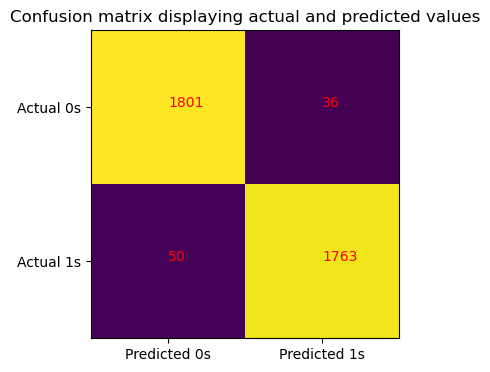

In [73]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification Report for Testing data

In [74]:
# classification report between actual and predicted test samples
report=classification_report(Y_TEST,y_pred)
# print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1837
           1       0.98      0.97      0.98      1813

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650



<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Decision Tree From Random Forest</h1>

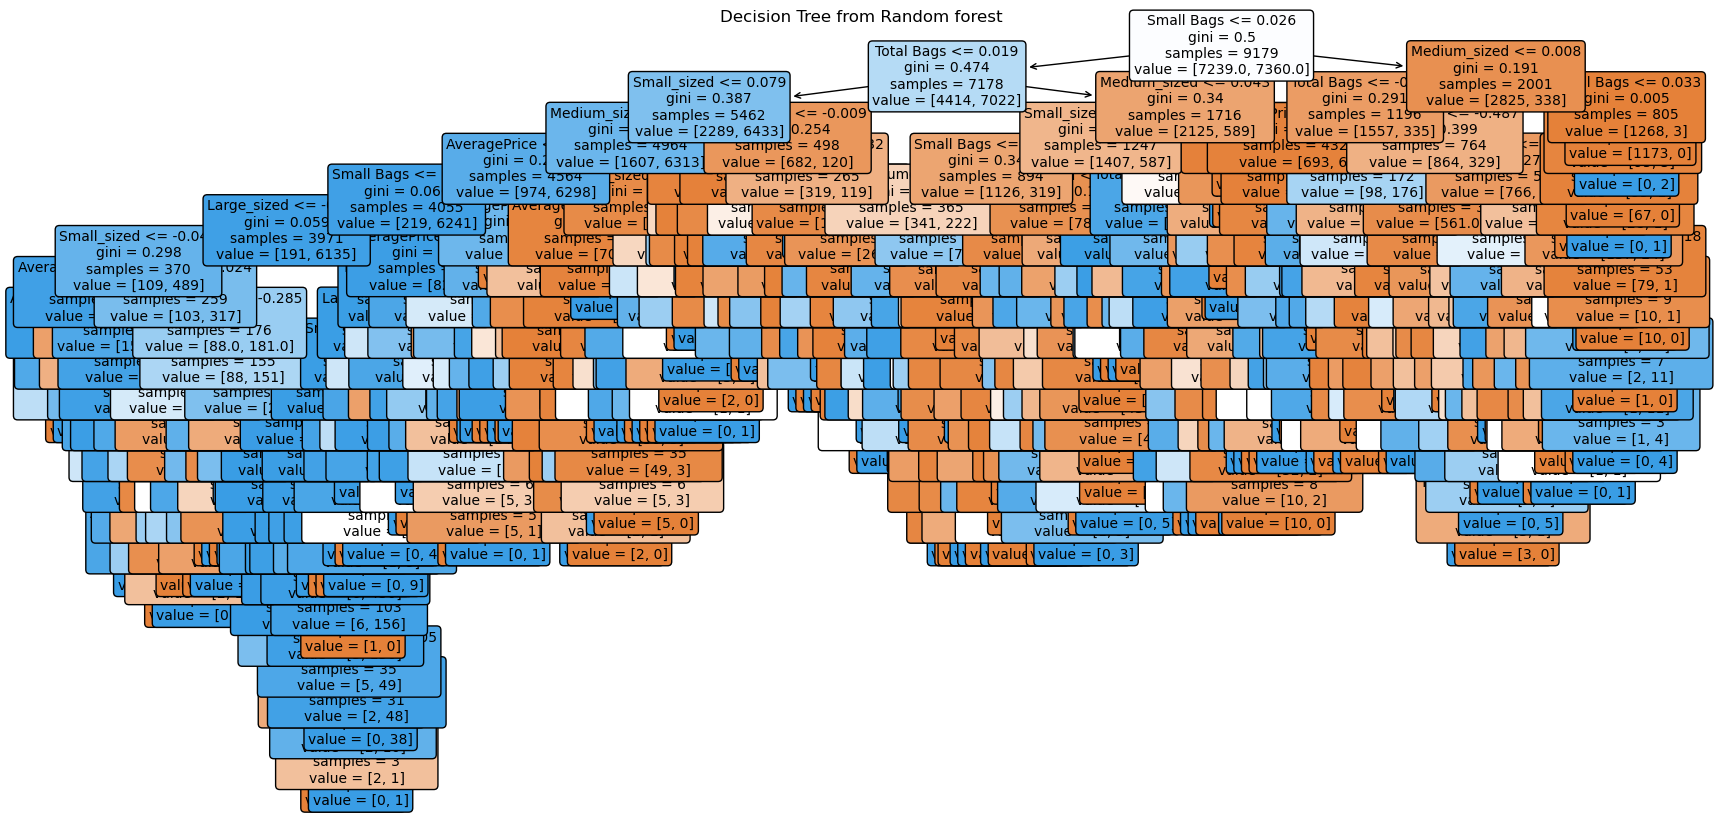

In [75]:
# selecting a single decison tree from the trained RandomForestregressor
tree_to_plot=rf_classifier.estimators_[0]
# creating a figure with width=20 and height=10
plt.figure(figsize=(20,10))
# plotting the decison tree
plot_tree(tree_to_plot,feature_names=df.columns.tolist(),filled=True,rounded=True,fontsize=10)
# specifying the title as Decison Tree from random forest
plt.title("Decision Tree from Random forest")
# plotting the tree
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Artificial Neural Network</h1>

## Training the model

In [76]:
# creating the artificial neural network
# specifying the model as a stacked model using sequential class
nn_classifier=Sequential([
    # specify the input shape equal to the features in x_TRAIN
    Input(shape=(X_TRAIN.shape[1],)),
    # input layer with 32 neurons and relu as activation function
    Dense(32,activation='relu'),
    # hidden layer with 16 neurons and relu as actvation function
    Dense(16,activation='relu'),
    # output layer specified according to unique values in Y and sigmoid as activation function
    Dense(len(Y.unique()),activation='sigmoid')
])
#print summary of neural network
nn_classifier.summary()

NameError: name 'Sequential' is not defined

## Compile the model

In [ ]:
# compile the model
nn_classifier.compile(optimizer='adam',# optimizer used to adapt the learning rate 
loss='sparse_categorical_crossentropy',# used to find the loss and is suitable for classification purposes
metrics=['accuracy']) # tracks the accuracy of model durng training and evaluation

# train the model on training features and classes 
nn_classifier.fit(X_TRAIN,Y_TRAIN,epochs=30,batch_size=32,validation_split=0.2)


## Evaluation on training data

### Training Accuracy and loss

In [ ]:
# evaluate training accuracy and loss using evaluate function
Training_loss,Training_accuracy=nn_classifier.evaluate(X_TRAIN,Y_TRAIN)
# print training accuracy
print("Training Accuracy : ",Training_accuracy)
# print training loss
print("Training Loss : ",Training_loss)


### Confusion Matrix of training data

In [ ]:
# make predictions on training data
Y_pred=y_pred=nn_classifier.predict(X_TRAIN)
# convert @D array into 1D array
Y_pred = np.argmax(y_pred, axis=1)
# print the predicted values
print(Y_pred)

#### Plotting the matrix

In [ ]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TRAIN,Y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification report of training data

In [ ]:
# classification report between actual and predicted test samples
report=classification_report(Y_TRAIN,Y_pred)
# print the classification report
print(report)

## Evaluation on testing data

In [ ]:
# calculate testing accuracy and loss using evaluate function
Test_loss,Test_accuracy=nn_classifier.evaluate(X_TEST,Y_TEST)
# print testing accuracy
print("Testing Accuracy : ",Test_accuracy)
# print testing loss
print("Testing Loss : ",Test_loss)

### Confusion matrix of testing data

In [ ]:
# make predictions on test data
y_pred=nn_classifier.predict(X_TEST)
# convert the 1D array to 1D array
y_pred = np.argmax(y_pred, axis=1)
# print the predicted values
print(y_pred)

#### Plotting the matrix

In [ ]:
# plot the confusion matrix between actual and predicted test samples
cm=confusion_matrix(Y_TEST,y_pred)
# specify the figure size
fig,ax=plt.subplots(figsize=(4,4))
# plot the matrix as an image
ax.imshow(cm)
# set the labels of x axis
ax.xaxis.set(ticks=([0,1]),ticklabels=["Predicted 0s","Predicted 1s"])
# set the labels of y axis
ax.yaxis.set(ticks=([0,1]),ticklabels=["Actual 0s","Actual 1s"])
# adding title to the matrix
plt.title("Confusion matrix displaying actual and predicted values")
# set the limit of matrix for better visuals 
ax.set_ylim(1.5,-0.5)
# iterate over rows and columns to get the counts of predicted values
for i in range(2):
    for j in range(2):
        # adding properties to matrix's text
        ax.text(j,i,cm[i,j],color='red')
# show the matrix
plt.show()

#### Classification report of testing data

In [ ]:
# classification report between actual and predicted test samples
report=classification_report(Y_TEST,y_pred)
# print the classification report
print(report)

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Conclusion</h1>

<h2 style="color:red;font-family:cursive;text-align:left;font-weight:100;">Best Model:</h2
                                                                                          >

<p style="color:blue;font-family:cursive;text-align:center;font-weight:100;">Neural network perfomed best among all the models with
    Training Accuracy :  0.9675320386886597 and
    Testing Accuracy :  0.970410943031311</p>

<h2 style="color:red;font-family:cursive;text-align:left;font-weight:100;">Other Models:</h2>

<p style="color:blue;font-family:cursive;text-align:center;font-weight:100;">1.SVC has training and testing accuracies near 94%</p>
<p style="color:blue;font-family:cursive;text-align:center;font-weight:100;">2.GaussianNB and Logistic Regression are well-generalized models with both training and testing accuracies beig equal as training and testing accuracies for GaussianNB are 74% and 92% for Logistic regression</p>
<p style="color:blue;font-family:cursive;text-align:center;font-weight:100;">3.Decision Tree and random forest models have training accuracies slightly higher higher than testing accuracies with training accuracy 100% and testing accuracies 96%</p>